# Lepton-Jet Isolation Study
### In signal processes, lepton-jets are produced with little activity nearby. 
### Therefore, a requirement on the lepton-jet isolation can distinguish lepton-jets in signal events from lepton-jets produced by hadronic jets in background events. 
### The lepton-jet isolation is defined as $\frac{E_{Matched-Jet}}{E_{Lepton-Jet}}$ X (1 - Lepton Fraction of Matched Jet).

#### In this notebook, I'll check the LJ isolation varies with decay length and bound state mass. 
#### I'll also separate the basic LJ into Mu, EGM-type LJ, and more specific LJ as well (PF Muon, DSA Muon, Electron, and Photon)

In [2]:
# python
import sys
import os
import importlib
# columnar analysis
from coffea import processor
from coffea.nanoevents import NanoEventsFactory, NanoAODSchema
import awkward as ak
from dask.distributed import Client, performance_report
# local
sidm_path = str(os.getcwd()).split("/sidm")[0]
# sidm_path = str(sys.path[0]).split("/sidm")[0]
if sidm_path not in sys.path: sys.path.insert(1, sidm_path)
from sidm.tools import utilities, sidm_processor, scaleout, cutflow
# always reload local modules to pick up changes during development
importlib.reload(utilities)
importlib.reload(sidm_processor)
importlib.reload(scaleout)
# plotting
import matplotlib.pyplot as plt
utilities.set_plot_style()
%matplotlib inline
from tqdm.notebook import tqdm

In [3]:
client = scaleout.make_dask_client("tls://localhost:8786")
client

Connection method: Direct,
Dashboard: /user/dongyub.lee@cern.ch/proxy/8787/status,
Comm: tls://192.168.202.58:8786,Workers: 0
Dashboard: /user/dongyub.lee@cern.ch/proxy/8787/status,Total threads: 0
Started: 1 hour ago,Total memory: 0 B


In [3]:
samples = [
    "2Mu2E_100GeV_5p0GeV_0p4mm",
    "2Mu2E_150GeV_5p0GeV_0p27mm",
    "2Mu2E_200GeV_5p0GeV_0p2mm",
    "2Mu2E_500GeV_5p0GeV_0p08mm",
    "2Mu2E_500GeV_5p0GeV_80p0mm",
    "2Mu2E_800GeV_5p0GeV_0p05mm",
    "2Mu2E_1000GeV_5p0GeV_0p04mm",  

    "4Mu_100GeV_5p0GeV_0p4mm",
    "4Mu_150GeV_5p0GeV_0p27mm",
    "4Mu_200GeV_5p0GeV_0p2mm",
    "4Mu_500GeV_5p0GeV_0p08mm",
    "4Mu_500GeV_5p0GeV_80p0mm",
    "4Mu_800GeV_5p0GeV_0p05mm",
    "4Mu_1000GeV_5p0GeV_0p04mm",
    
    "TTJets",
]

In [4]:
fileset = utilities.make_fileset(samples[:7], 
                                 "llpNanoAOD_v2", 
                                 location_cfg="signal_2mu2e_v10.yaml",
                                 max_files = -1,
                                )

fileset = utilities.make_fileset(samples[7:14], 
                                 "llpNanoAOD_v2",
                                 location_cfg="signal_4mu_v10.yaml",
                                fileset=fileset,
                                max_files = -1, 
                                #max_files =1, 
                                )

fileset = utilities.make_fileset(samples[14:15], 
                                 "skimmed_llpNanoAOD_v2",
                                 location_cfg="backgrounds.yaml",
                                fileset=fileset,
                                max_files = -1, 
                                #max_files =1, 
                                )

In [4]:
samples = [
    "2Mu2E_500GeV_5p0GeV_0p08mm",
    "2Mu2E_500GeV_5p0GeV_80p0mm",

    "4Mu_500GeV_5p0GeV_0p08mm",
    "4Mu_500GeV_5p0GeV_80p0mm",
    
    "TTJets",
]

In [5]:
fileset = utilities.make_fileset(samples[:2], 
                                 "llpNanoAOD_v2", 
                                 location_cfg="signal_2mu2e_v10.yaml",
                                 max_files = -1,
                                )

fileset = utilities.make_fileset(samples[2:4], 
                                 "llpNanoAOD_v2",
                                 location_cfg="signal_4mu_v10.yaml",
                                fileset=fileset,
                                max_files = -1, 
                                #max_files =1, 
                                )

fileset = utilities.make_fileset(samples[4:5], 
                                 "skimmed_llpNanoAOD_v2",
                                 location_cfg="backgrounds.yaml",
                                fileset=fileset,
                                max_files = -1, 
                                #max_files =1, 
                                )

In [6]:
runner = processor.Runner(
    # executor=processor.DaskExecutor(client=client),
    executor=processor.IterativeExecutor(),
    # executor=processor.FuturesExecutor(), 
    schema=NanoAODSchema,
#    maxchunks=10, 
    skipbadfiles=True
)

channels = [
    "base",
]

p = sidm_processor.SidmProcessor(
    channels,
    ["isolation_base"],
    lj_reco_choices=["0.4"],
    unweighted_hist=True,
)

import coffea.util as coffea_util
coffea_util.save(p, "processor.coffea")
print(coffea_util.load("processor.coffea"))
with performance_report(filename="dask-report.html"):
    output = runner.run(fileset, treename="Events", processor_instance=p)

out = output["out"]

Output()

Output()

/usr/local/lib/python3.10/site-packages/coffea/nanoevents/schemas/nanoaod.py:205: RuntimeWarning: Missing 
cross-reference index for LowPtElectron_electronIdx => Electron
  warnings.warn(

/usr/local/lib/python3.10/site-packages/coffea/nanoevents/schemas/nanoaod.py:205: RuntimeWarning: Missing 
cross-reference index for LowPtElectron_photonIdx => Photon
  warnings.warn(

/usr/local/lib/python3.10/site-packages/awkward/_connect/_numpy.py:197: RuntimeWarning: invalid value encountered 
in divide
  result = getattr(ufunc, method)(

#--------------------------------------------------------------------------
#                         FastJet release 3.4.0
#                 M. Cacciari, G.P. Salam and G. Soyez                  
#     A software package for jet finding and analysis at colliders      
#                           http://fastjet.fr                           
#	                                                                      
# Please cite EPJC72(2012)1896 [arXiv:1111.6097] if you use this package
# for scientific work and optionally PLB641(2006)57 [hep-ph/0512210].   
#                                                                       
# FastJet is provided without warranty under the GNU GPL v2 or higher.  
# It uses T. Chan's closest pair algorithm, S. Fortune's Voronoi code,
# CGAL and 3rd party plugin jet algorithms. See COPYING file for details.
#--------------------------------------------------------------------------


/usr/local/lib/python3.10/site-packages/coffea/nanoevents/schemas/nanoaod.py:205: RuntimeWarning: Missing 
cross-reference index for LowPtElectron_electronIdx => Electron
  warnings.warn(

/usr/local/lib/python3.10/site-packages/coffea/nanoevents/schemas/nanoaod.py:205: RuntimeWarning: Missing 
cross-reference index for LowPtElectron_photonIdx => Photon
  warnings.warn(

/usr/local/lib/python3.10/site-packages/awkward/_connect/_numpy.py:197: RuntimeWarning: overflow encountered in 
multiply
  result = getattr(ufunc, method)(

/usr/local/lib/python3.10/site-packages/awkward/_connect/_numpy.py:197: RuntimeWarning: invalid value encountered 
in add
  result = getattr(ufunc, method)(

/usr/local/lib/python3.10/site-packages/awkward/_connect/_numpy.py:197: RuntimeWarning: overflow encountered in 
power
  result = getattr(ufunc, method)(

/usr/local/lib/python3.10/site-packages/awkward/_connect/_numpy.py:197: RuntimeWarning: overflow encountered in add
  result = getattr(ufunc, method)(

/usr/local/lib/python3.10/site-packages/coffea/processor/executor.py:1525: UserWarning: file not found ([ERROR] 
Server responded with an error: [3010] Unable to open 
/store/group/lpcmetx/SIDM/ULSignalSamples/2018_v10/BsTo2DpTo4Mu/CutDecayFalse_SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_cta
u-0p08_v3/LLPnanoAODv2/CutDecayFalse_SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-0p08_v3_part-52.root; permission denied
)

    'root://xcache//store/group/lpcmetx/SIDM/ULSignalSamples/2018_v10/BsTo2DpTo4Mu/CutDecayFalse_SIDM_BsTo2DpTo4Mu_
MBs-500_MDp-5p0_ctau-0p08_v3/LLPnanoAODv2/CutDecayFalse_SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-0p08_v3_part-52.root
'

Files may be specified as:
   * str/bytes: relative or absolute filesystem path or URL, without any colons
         other than Windows drive letter or URL schema.
         Examples: "rel/file.root", "C:\abs\file.root", "http://where/what.root"
   * str/bytes: same with an object-within-ROOT path, separated by a colon.
         Example: "rel/file.root:tdirectory/ttree"
   * pathlib.Path: always interpreted as a filesystem path or URL only (no
         object-within-ROOT path), regardless of whether there are any colons.
         Examples: Path("rel:/file.root"), Path("/abs/path:stuff.root")

Functions that accept many files (uproot.iterate, etc.) also allow:
   * glob syntax in str/bytes and pathlib.Path.
         Examples: Path("rel/*.root"), "/abs/*.root:tdirectory/ttree"
   * dict: keys are filesystem paths, values are objects-within-ROOT paths.
         Example: {"/data_v1/*.root": "ttree_v1", "/data_v2/*.root": "ttree_v2"}
   * already-open TTree objects.
   * iterables of the above.

  warnings.warn(str(e))

Signal not in xs cfg, assuming 1fb
Signal not in xs cfg, assuming 1fb
Signal not in xs cfg, assuming 1fb
Signal not in xs cfg, assuming 1fb


## Let's start with decay length dependency on LJ isolation and other matched jet distributions
#### I'll use BS: 500 GeV, DP: 5 GeV as base point for 2Mu2E and 4Mu signals.
#### Shortest & Longest decay length samples will be used for each channel

#### Since Dask does not work well, it's impossible to run over all backgrounds, including QCD and DYJets.
#### So, I'll only use TTJets for background for the moment

In [6]:
samples_2mu2e = [
    "2Mu2E_500GeV_5p0GeV_0p08mm",
    "2Mu2E_500GeV_5p0GeV_80p0mm",
    
    "TTJets"
]

samples_4mu = [    
    "4Mu_500GeV_5p0GeV_0p08mm",
    "4Mu_500GeV_5p0GeV_80p0mm",
    
    "TTJets"
]

### Since Lepton-Jet and PF Jet are reconstructed with the same algorithm (fastjet with anti-$k_{T}$), these two objects should be treated as the same object and have the same distribution.
### So, let's check the $p_{T}$ of lepton-jet and matched-jet first. Ideally, $p_{T}$ of Lepton-Jet (Matched-Jet) peaks on half of the bound state mass.
### On the other hand, the background will have normal PF jet behavior. So they should show a different peak.

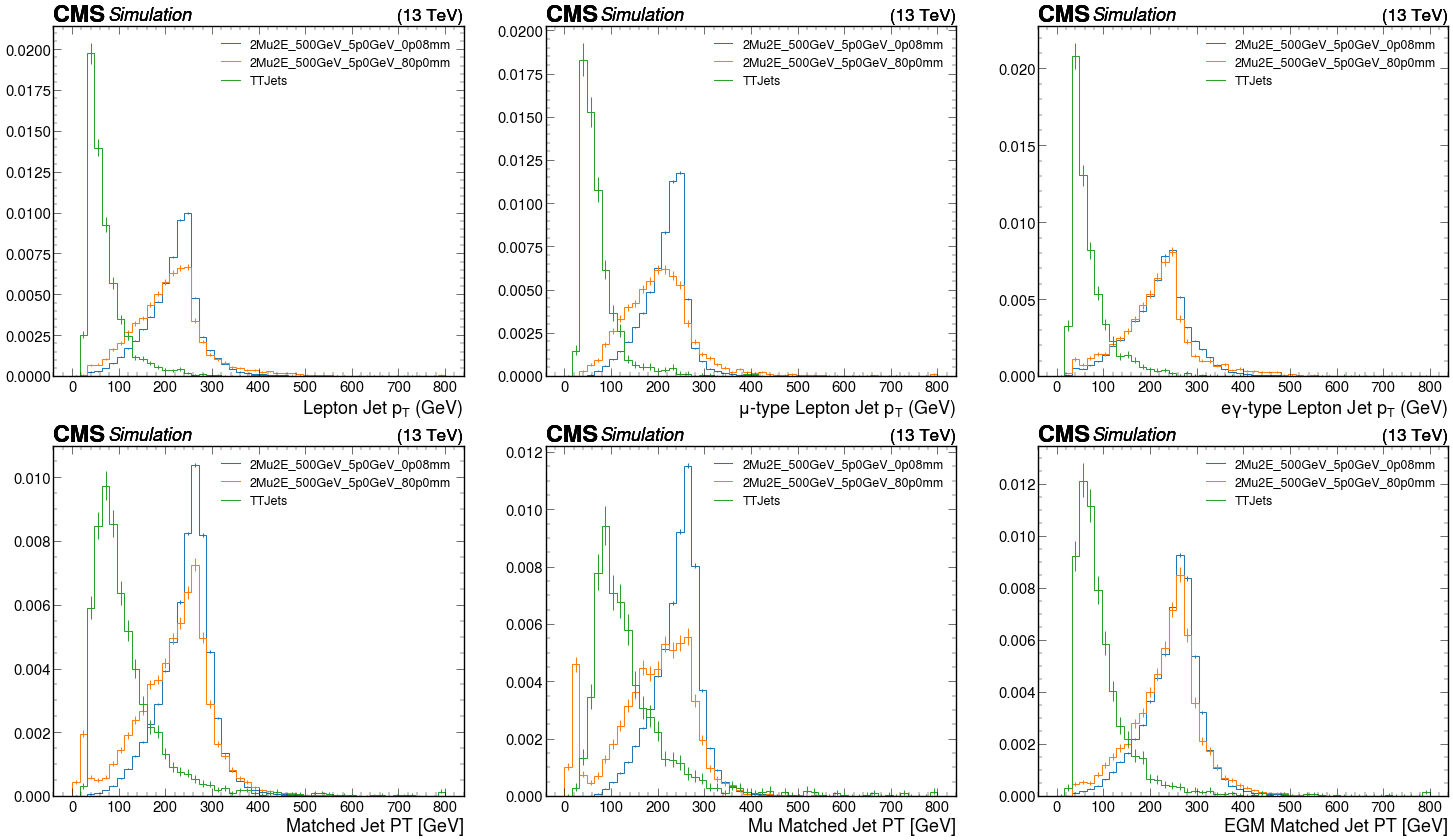

In [7]:
plt.subplots(2,3,figsize=(36,20))

plt.subplot(2,3,1)
for sample in samples_2mu2e:
    utilities.plot(out[sample]["hists"]["lj_pt"][channels[0], :], density=True)
plt.legend(samples_2mu2e, loc=1, prop={'size': 18})

plt.subplot(2,3,2)
for sample in samples_2mu2e:
    utilities.plot(out[sample]["hists"]["mu_lj_pt"][channels[0], :], density=True)
plt.legend(samples_2mu2e, loc=1, prop={'size': 18})

plt.subplot(2,3,3)
for sample in samples_2mu2e:
    utilities.plot(out[sample]["hists"]["egm_lj_pt"][channels[0], :], density=True)
plt.legend(samples_2mu2e, loc=1, prop={'size': 18})

plt.subplot(2,3,4)
for sample in samples_2mu2e:
    utilities.plot(out[sample]["hists"]["matched_jet_pt"][channels[0], :], density=True)
plt.legend(samples_2mu2e, loc=1, prop={'size': 18})

plt.subplot(2,3,5)
for sample in samples_2mu2e:
    utilities.plot(out[sample]["hists"]["mu_matched_jet_pt"][channels[0], :], density=True)
plt.legend(samples_2mu2e, loc=1, prop={'size': 18})

plt.subplot(2,3,6)
for sample in samples_2mu2e:
    utilities.plot(out[sample]["hists"]["egm_matched_jet_pt"][channels[0], :], density=True)
plt.legend(samples_2mu2e, loc=1, prop={'size': 18})

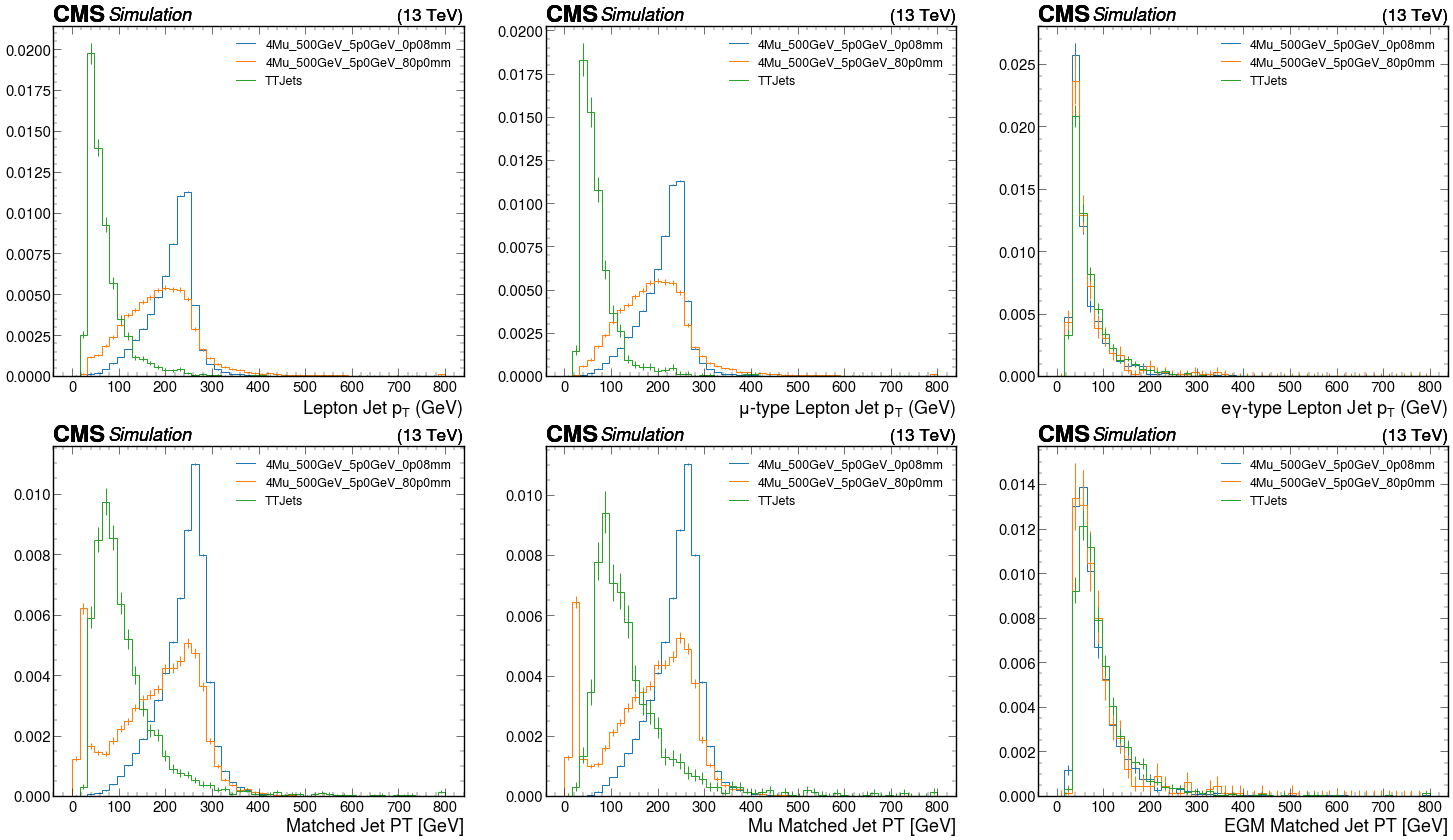

In [8]:
plt.subplots(2,3,figsize=(36,20))

plt.subplot(2,3,1)
for sample in samples_4mu:
    utilities.plot(out[sample]["hists"]["lj_pt"][channels[0], :], density=True)
plt.legend(samples_4mu, loc=1, prop={'size': 18})

plt.subplot(2,3,2)
for sample in samples_4mu:
    utilities.plot(out[sample]["hists"]["mu_lj_pt"][channels[0], :], density=True)
plt.legend(samples_4mu, loc=1, prop={'size': 18})

plt.subplot(2,3,3)
for sample in samples_4mu:
    utilities.plot(out[sample]["hists"]["egm_lj_pt"][channels[0], :], density=True)
plt.legend(samples_4mu, loc=1, prop={'size': 18})

plt.subplot(2,3,4)
for sample in samples_4mu:
    utilities.plot(out[sample]["hists"]["matched_jet_pt"][channels[0], :], density=True)
plt.legend(samples_4mu, loc=1, prop={'size': 18})

plt.subplot(2,3,5)
for sample in samples_4mu:
    utilities.plot(out[sample]["hists"]["mu_matched_jet_pt"][channels[0], :], density=True)
plt.legend(samples_4mu, loc=1, prop={'size': 18})

plt.subplot(2,3,6)
for sample in samples_4mu:
    utilities.plot(out[sample]["hists"]["egm_matched_jet_pt"][channels[0], :], density=True)
plt.legend(samples_4mu, loc=1, prop={'size': 18})

#### For the signals, both lepton-jet and matched-jet have peaks where we expected them to be.
#### But, Mu type distribution of large decay length sample looks little bit weird to me.
#### The background has a different distribution than the signal (This should be a typical PF jet behavior).
#### On the EGM type of 4mu channel, signals also show a similar distribution to the background.
#### It makes sense because the 4mu channel doesn't have any EGM-type LJ. 
#### Cool! So we proved that lepton-jet and matched-jet are actually the same object.
#### Let's move on to more specific LJ categories

/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:262: RuntimeWarning: divide by zero encountered in double_scalars
  self.flat_scale(1 / np.sum(np.diff(self.edges) * self.values))
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:197: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  return np.abs(method_fcn(self.values, variances) - self.values)
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:242: RuntimeWarning: invalid value encountered in multiply
  self.values *= scale
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:243: RuntimeWarning: invalid value encountered in multiply
  self.yerr_lo *= scale
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:244: RuntimeWarning: invalid value encountered in multiply
  self.yerr_hi *= scale


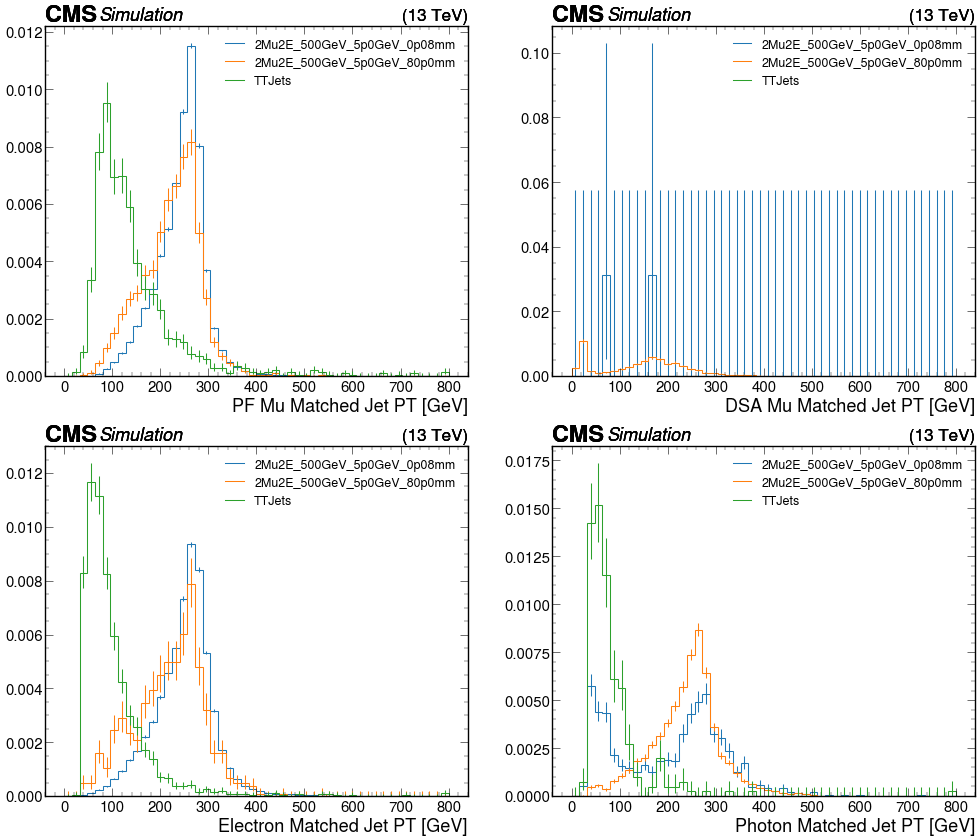

In [9]:
plt.subplots(2,2,figsize=(24,20))

plt.subplot(2,2,1)
for sample in samples_2mu2e:
    utilities.plot(out[sample]["hists"]["pfmu_matched_jet_pt"][channels[0], :], density=True)
plt.legend(samples_2mu2e, loc=1, prop={'size': 18})

plt.subplot(2,2,2)
for sample in samples_2mu2e:
    utilities.plot(out[sample]["hists"]["dsamu_matched_jet_pt"][channels[0], :], density=True)
plt.legend(samples_2mu2e, loc=1, prop={'size': 18})

plt.subplot(2,2,3)
for sample in samples_2mu2e:
    utilities.plot(out[sample]["hists"]["electron_matched_jet_pt"][channels[0], :], density=True)
plt.legend(samples_2mu2e, loc=1, prop={'size': 18})

plt.subplot(2,2,4)
for sample in samples_2mu2e:
    utilities.plot(out[sample]["hists"]["photon_matched_jet_pt"][channels[0], :], density=True)
plt.legend(samples_2mu2e, loc=1, prop={'size': 18})

/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:262: RuntimeWarning: divide by zero encountered in double_scalars
  self.flat_scale(1 / np.sum(np.diff(self.edges) * self.values))
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:197: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  return np.abs(method_fcn(self.values, variances) - self.values)
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:242: RuntimeWarning: invalid value encountered in multiply
  self.values *= scale
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:243: RuntimeWarning: invalid value encountered in multiply
  self.yerr_lo *= scale
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:244: RuntimeWarning: invalid value encountered in multiply
  self.yerr_hi *= scale


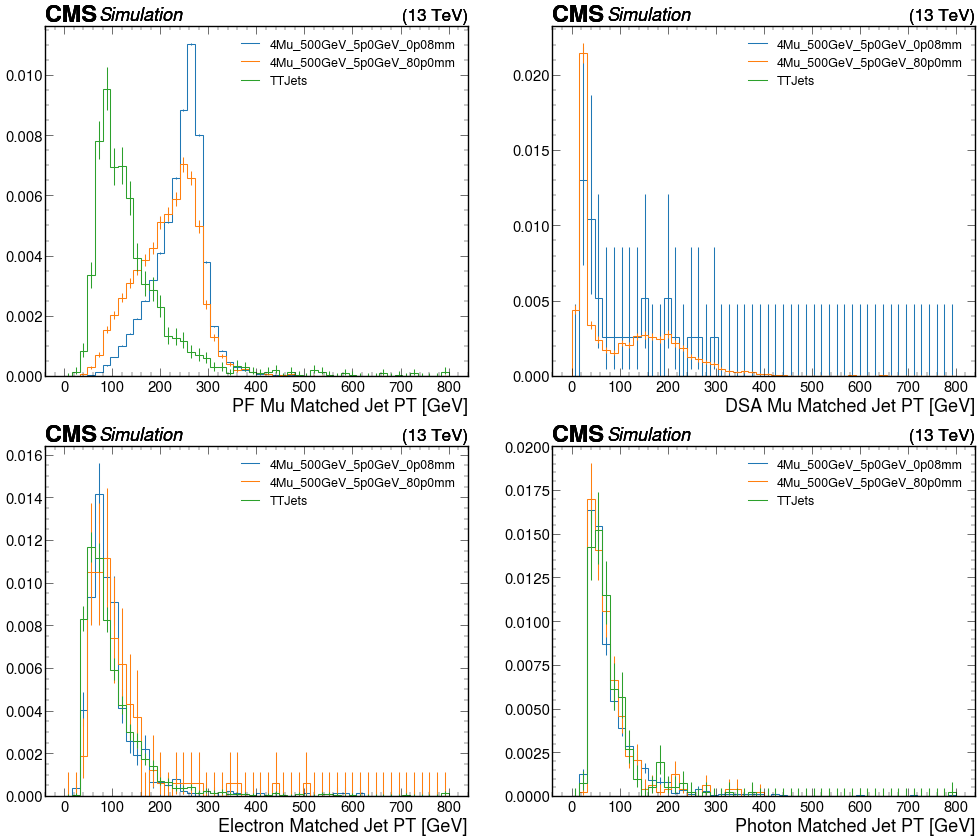

In [10]:
plt.subplots(2,2,figsize=(24,20))

plt.subplot(2,2,1)
for sample in samples_4mu:
    utilities.plot(out[sample]["hists"]["pfmu_matched_jet_pt"][channels[0], :], density=True)
plt.legend(samples_4mu, loc=1, prop={'size': 18})

plt.subplot(2,2,2)
for sample in samples_4mu:
    utilities.plot(out[sample]["hists"]["dsamu_matched_jet_pt"][channels[0], :], density=True)
plt.legend(samples_4mu, loc=1, prop={'size': 18})

plt.subplot(2,2,3)
for sample in samples_4mu:
    utilities.plot(out[sample]["hists"]["electron_matched_jet_pt"][channels[0], :], density=True)
plt.legend(samples_4mu, loc=1, prop={'size': 18})

plt.subplot(2,2,4)
for sample in samples_4mu:
    utilities.plot(out[sample]["hists"]["photon_matched_jet_pt"][channels[0], :], density=True)
plt.legend(samples_4mu, loc=1, prop={'size': 18})

#### Ah! So, basically weird distributions of Mu type comes from DSA Mu type!
#### And only large decay length sample have contribution of DSA Mu type. Need to discuss about this.
#### DSA Mu type might not established well at this moment, so need to revisit someday.
#### Other matched-jet categories looks pretty reasonable to me.

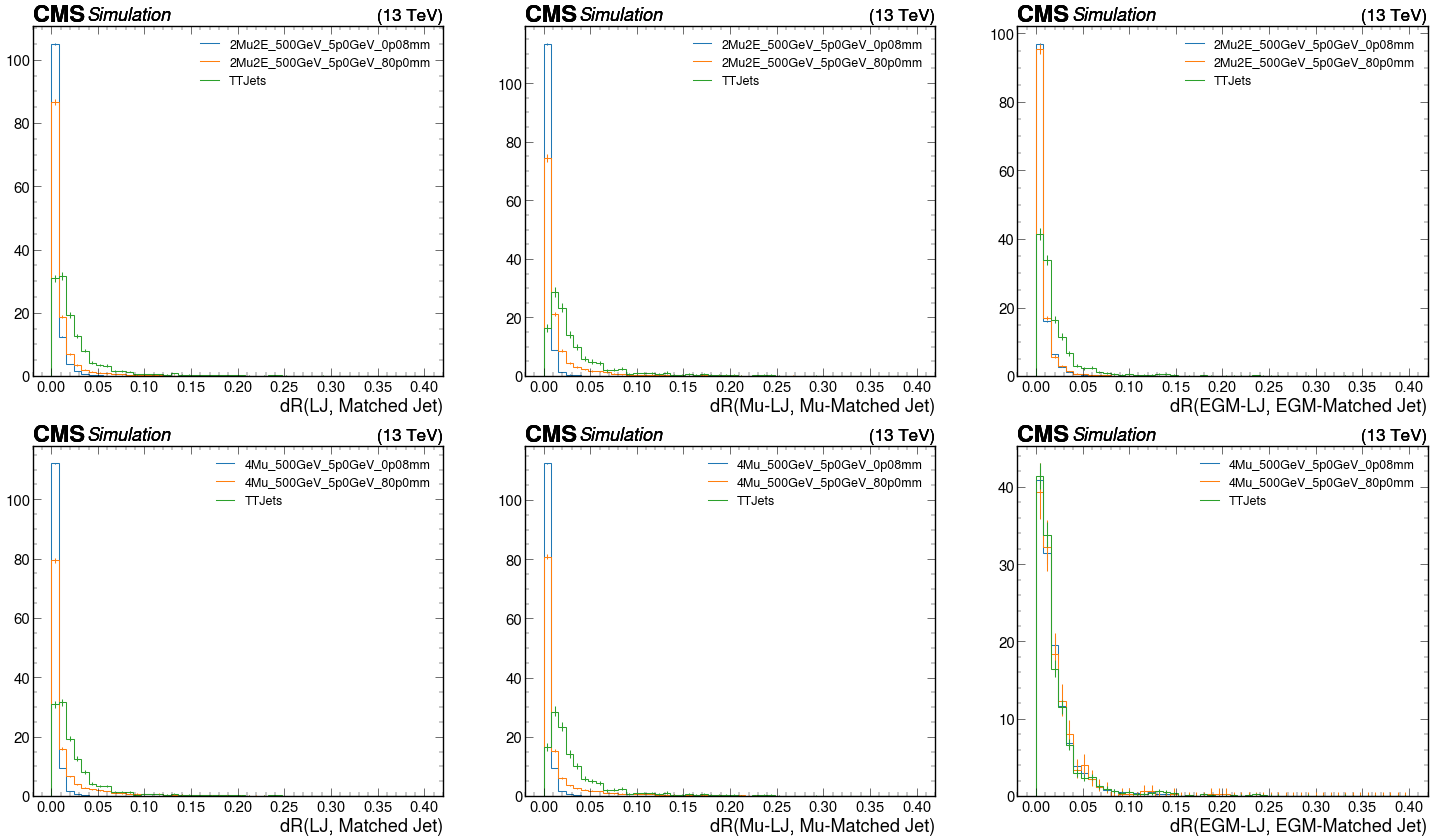

In [11]:
plt.subplots(2,3,figsize=(36,20))

plt.subplot(2,3,1)
for sample in samples_2mu2e:
    utilities.plot(out[sample]["hists"]["matched_jet_lj_dR"][channels[0], :], density=True)
plt.legend(samples_2mu2e, loc=1, prop={'size': 18})

plt.subplot(2,3,2)
for sample in samples_2mu2e:
    utilities.plot(out[sample]["hists"]["mu_matched_jet_lj_dR"][channels[0], :], density=True)
plt.legend(samples_2mu2e, loc=1, prop={'size': 18})

plt.subplot(2,3,3)
for sample in samples_2mu2e:
    utilities.plot(out[sample]["hists"]["egm_matched_jet_lj_dR"][channels[0], :], density=True)
plt.legend(samples_2mu2e, loc=1, prop={'size': 18})

plt.subplot(2,3,4)
for sample in samples_4mu:
    utilities.plot(out[sample]["hists"]["matched_jet_lj_dR"][channels[0], :], density=True)
plt.legend(samples_4mu, loc=1, prop={'size': 18})

plt.subplot(2,3,5)
for sample in samples_4mu:
    utilities.plot(out[sample]["hists"]["mu_matched_jet_lj_dR"][channels[0], :], density=True)
plt.legend(samples_4mu, loc=1, prop={'size': 18})

plt.subplot(2,3,6)
for sample in samples_4mu:
    utilities.plot(out[sample]["hists"]["egm_matched_jet_lj_dR"][channels[0], :], density=True)
plt.legend(samples_4mu, loc=1, prop={'size': 18})

#### Great! All the dR between lepton-jet and matched-jet satisfies the thereshold that was applied.
#### Most of the event living on first bin, which proved again that matched-jet and lepton-jet are actually same object.

/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:262: RuntimeWarning: divide by zero encountered in double_scalars
  self.flat_scale(1 / np.sum(np.diff(self.edges) * self.values))
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:197: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  return np.abs(method_fcn(self.values, variances) - self.values)
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:242: RuntimeWarning: invalid value encountered in multiply
  self.values *= scale
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:243: RuntimeWarning: invalid value encountered in multiply
  self.yerr_lo *= scale
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:244: RuntimeWarning: invalid value encountered in multiply
  self.yerr_hi *= scale


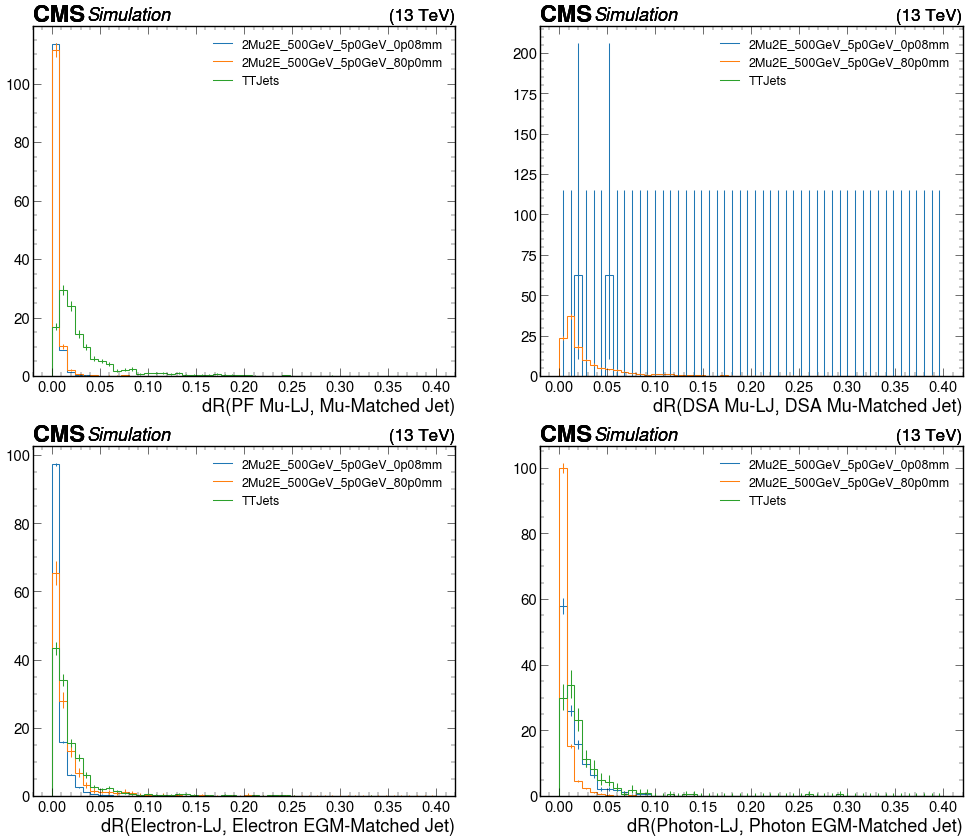

In [12]:
plt.subplots(2,2,figsize=(24,20))

plt.subplot(2,2,1)
for sample in samples_2mu2e:
    utilities.plot(out[sample]["hists"]["pfmu_matched_jet_lj_dR"][channels[0], :], density=True)
plt.legend(samples_2mu2e, loc=1, prop={'size': 18})

plt.subplot(2,2,2)
for sample in samples_2mu2e:
    utilities.plot(out[sample]["hists"]["dsamu_matched_jet_lj_dR"][channels[0], :], density=True)
plt.legend(samples_2mu2e, loc=1, prop={'size': 18})

plt.subplot(2,2,3)
for sample in samples_2mu2e:
    utilities.plot(out[sample]["hists"]["electron_matched_jet_lj_dR"][channels[0], :], density=True)
plt.legend(samples_2mu2e, loc=1, prop={'size': 18})

plt.subplot(2,2,4)
for sample in samples_2mu2e:
    utilities.plot(out[sample]["hists"]["photon_matched_jet_lj_dR"][channels[0], :], density=True)
plt.legend(samples_2mu2e, loc=1, prop={'size': 18})

/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:262: RuntimeWarning: divide by zero encountered in double_scalars
  self.flat_scale(1 / np.sum(np.diff(self.edges) * self.values))
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:197: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  return np.abs(method_fcn(self.values, variances) - self.values)
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:242: RuntimeWarning: invalid value encountered in multiply
  self.values *= scale
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:243: RuntimeWarning: invalid value encountered in multiply
  self.yerr_lo *= scale
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:244: RuntimeWarning: invalid value encountered in multiply
  self.yerr_hi *= scale


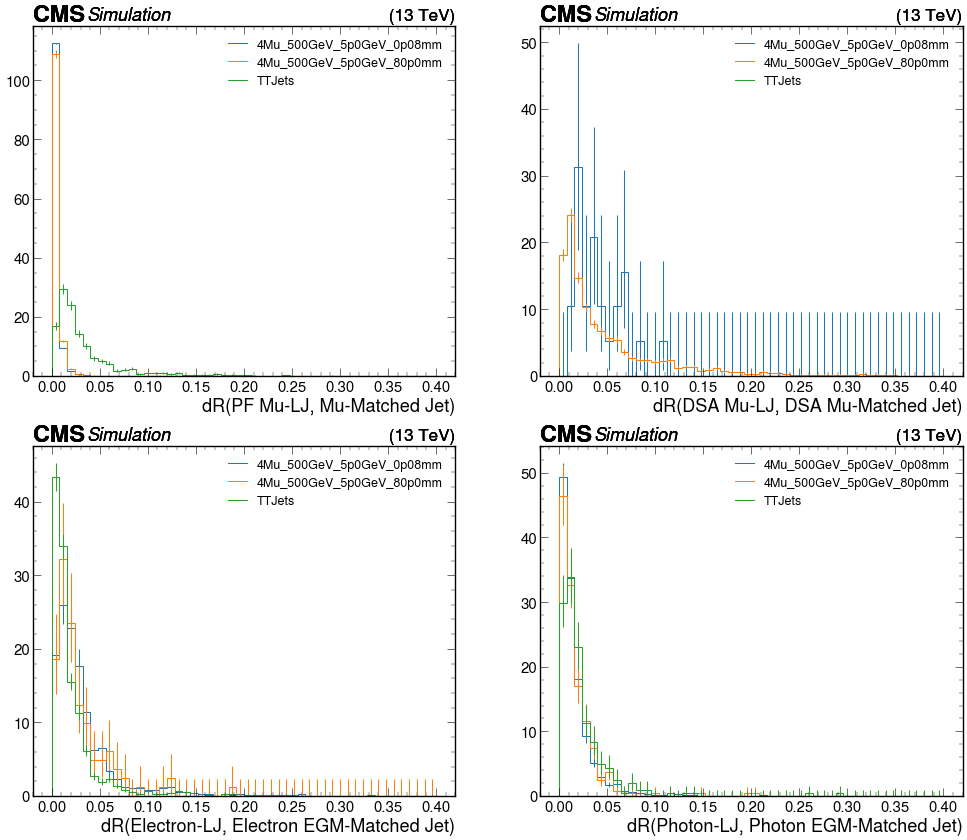

In [13]:
plt.subplots(2,2,figsize=(24,20))

plt.subplot(2,2,1)
for sample in samples_4mu:
    utilities.plot(out[sample]["hists"]["pfmu_matched_jet_lj_dR"][channels[0], :], density=True)
plt.legend(samples_4mu, loc=1, prop={'size': 18})

plt.subplot(2,2,2)
for sample in samples_4mu:
    utilities.plot(out[sample]["hists"]["dsamu_matched_jet_lj_dR"][channels[0], :], density=True)
plt.legend(samples_4mu, loc=1, prop={'size': 18})

plt.subplot(2,2,3)
for sample in samples_4mu:
    utilities.plot(out[sample]["hists"]["electron_matched_jet_lj_dR"][channels[0], :], density=True)
plt.legend(samples_4mu, loc=1, prop={'size': 18})

plt.subplot(2,2,4)
for sample in samples_4mu:
    utilities.plot(out[sample]["hists"]["photon_matched_jet_lj_dR"][channels[0], :], density=True)
plt.legend(samples_4mu, loc=1, prop={'size': 18})

#### The slightly broader distribution of Mu type turns out to be the effect of DSA Mu.
#### It is interesting to note that for PF Mu and photon types, I find a slight difference in distribution between signal and background.
#### Can we utilize this feature?

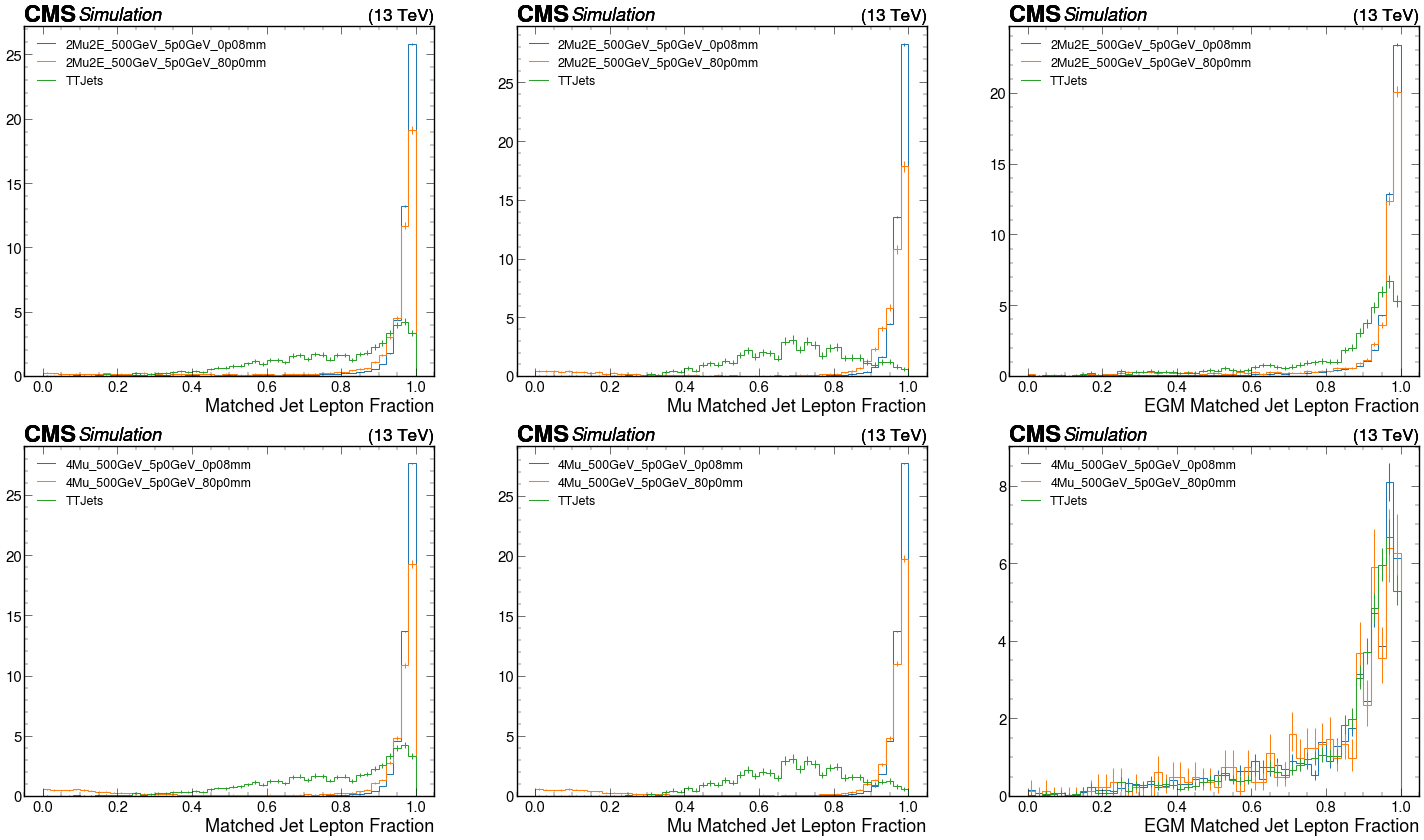

In [14]:
plt.subplots(2,3,figsize=(36,20))

plt.subplot(2,3,1)
for sample in samples_2mu2e:
    utilities.plot(out[sample]["hists"]["matched_jet_lepfraction"][channels[0], :], density=True)
plt.legend(samples_2mu2e, loc=2, prop={'size': 18})

plt.subplot(2,3,2)
for sample in samples_2mu2e:
    utilities.plot(out[sample]["hists"]["mu_matched_jet_lepfraction"][channels[0], :], density=True)
plt.legend(samples_2mu2e, loc=2, prop={'size': 18})

plt.subplot(2,3,3)
for sample in samples_2mu2e:
    utilities.plot(out[sample]["hists"]["egm_matched_jet_lepfraction"][channels[0], :], density=True)
plt.legend(samples_2mu2e, loc=2, prop={'size': 18})

plt.subplot(2,3,4)
for sample in samples_4mu:
    utilities.plot(out[sample]["hists"]["matched_jet_lepfraction"][channels[0], :], density=True)
plt.legend(samples_4mu, loc=2, prop={'size': 18})

plt.subplot(2,3,5)
for sample in samples_4mu:
    utilities.plot(out[sample]["hists"]["mu_matched_jet_lepfraction"][channels[0], :], density=True)
plt.legend(samples_4mu, loc=2, prop={'size': 18})

plt.subplot(2,3,6)
for sample in samples_4mu:
    utilities.plot(out[sample]["hists"]["egm_matched_jet_lepfraction"][channels[0], :], density=True)
plt.legend(samples_4mu, loc=2, prop={'size': 18})

#### Let's revisit the definition of lepton-jet isolation. The critical term is (1 - Lepton Fraction of Matched Jet) part.
#### Basically, lepton fraction of matched jet is defined as (Charged Electromagnetic Energy Fraction + Neutral Electromagnetic Energy Fraction + Muon Energy Fraction)
#### Since final state of signal is fully leptonic, most of the events living close to 1.
#### On the other hand, background have relatively flat distribution.
#### Note that Mu type distribution is clearly have discriminating power. We'll utilize this feature for future ABCD method

/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:262: RuntimeWarning: divide by zero encountered in double_scalars
  self.flat_scale(1 / np.sum(np.diff(self.edges) * self.values))
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:197: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  return np.abs(method_fcn(self.values, variances) - self.values)
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:242: RuntimeWarning: invalid value encountered in multiply
  self.values *= scale
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:243: RuntimeWarning: invalid value encountered in multiply
  self.yerr_lo *= scale
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:244: RuntimeWarning: invalid value encountered in multiply
  self.yerr_hi *= scale


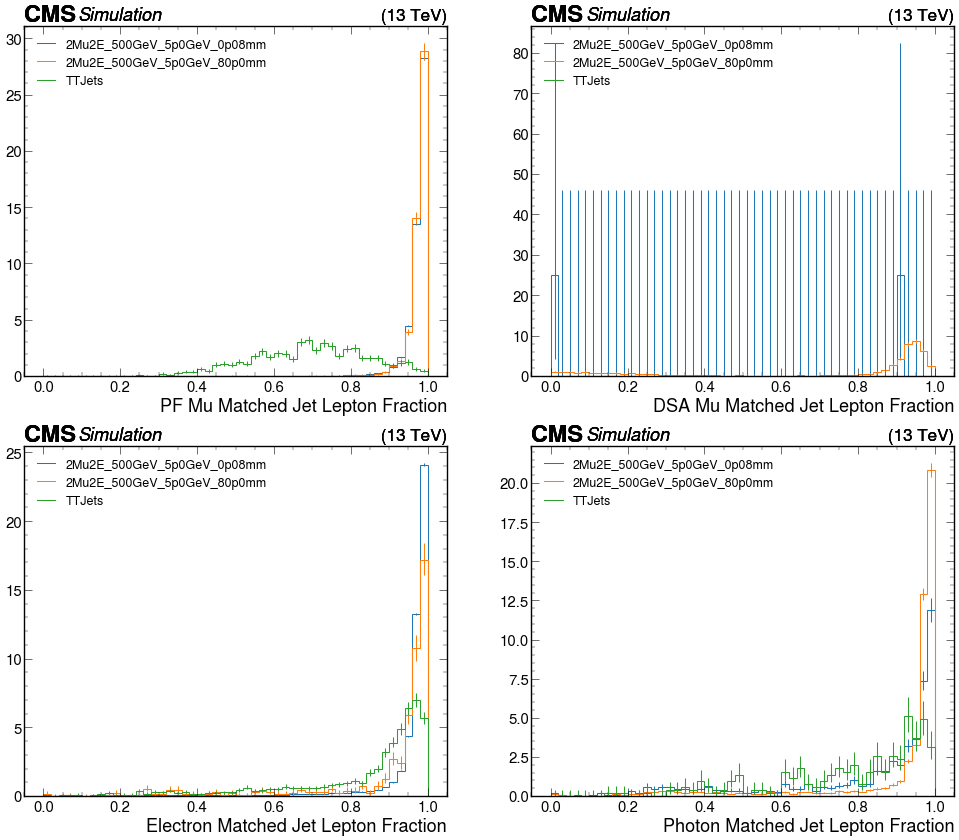

In [15]:
plt.subplots(2,2,figsize=(24,20))

plt.subplot(2,2,1)
for sample in samples_2mu2e:
    utilities.plot(out[sample]["hists"]["pfmu_matched_jet_lepfraction"][channels[0], :], density=True)
plt.legend(samples_2mu2e, loc=2, prop={'size': 18})

plt.subplot(2,2,2)
for sample in samples_2mu2e:
    utilities.plot(out[sample]["hists"]["dsamu_matched_jet_lepfraction"][channels[0], :], density=True)
plt.legend(samples_2mu2e, loc=2, prop={'size': 18})

plt.subplot(2,2,3)
for sample in samples_2mu2e:
    utilities.plot(out[sample]["hists"]["electron_matched_jet_lepfraction"][channels[0], :], density=True)
plt.legend(samples_2mu2e, loc=2, prop={'size': 18})

plt.subplot(2,2,4)
for sample in samples_2mu2e:
    utilities.plot(out[sample]["hists"]["photon_matched_jet_lepfraction"][channels[0], :], density=True)
plt.legend(samples_2mu2e, loc=2, prop={'size': 18})

/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:262: RuntimeWarning: divide by zero encountered in double_scalars
  self.flat_scale(1 / np.sum(np.diff(self.edges) * self.values))
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:197: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  return np.abs(method_fcn(self.values, variances) - self.values)
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:242: RuntimeWarning: invalid value encountered in multiply
  self.values *= scale
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:243: RuntimeWarning: invalid value encountered in multiply
  self.yerr_lo *= scale
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:244: RuntimeWarning: invalid value encountered in multiply
  self.yerr_hi *= scale


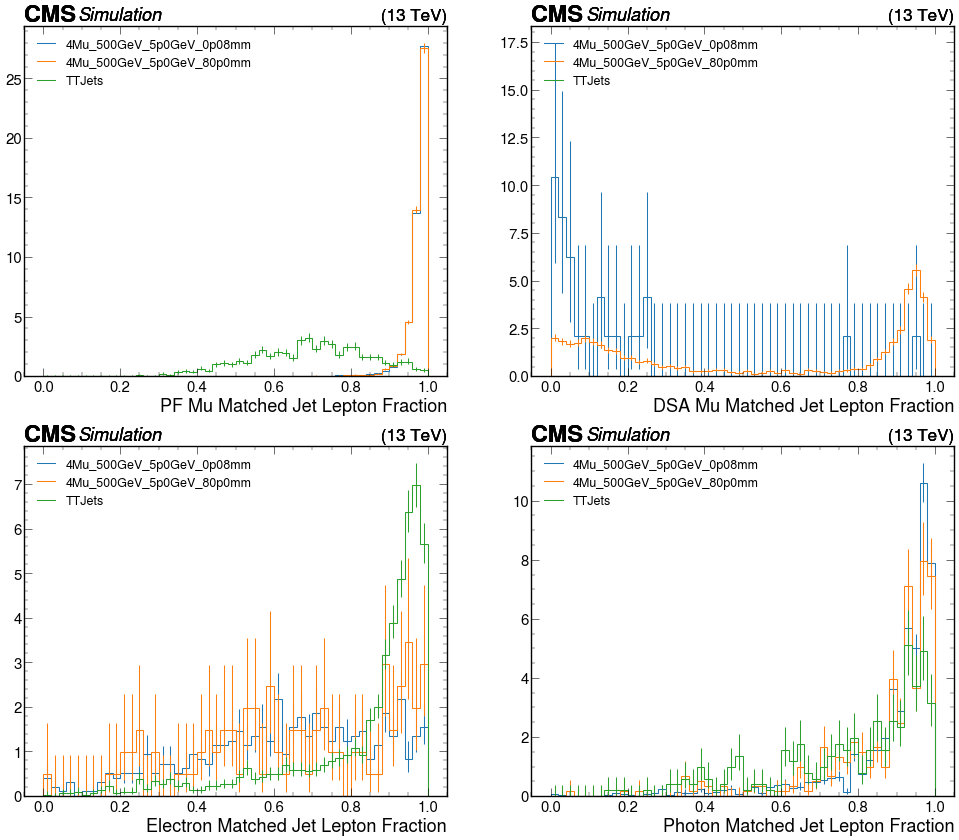

In [16]:
plt.subplots(2,2,figsize=(24,20))

plt.subplot(2,2,1)
for sample in samples_4mu:
    utilities.plot(out[sample]["hists"]["pfmu_matched_jet_lepfraction"][channels[0], :], density=True)
plt.legend(samples_4mu, loc=2, prop={'size': 18})

plt.subplot(2,2,2)
for sample in samples_4mu:
    utilities.plot(out[sample]["hists"]["dsamu_matched_jet_lepfraction"][channels[0], :], density=True)
plt.legend(samples_4mu, loc=2, prop={'size': 18})

plt.subplot(2,2,3)
for sample in samples_4mu:
    utilities.plot(out[sample]["hists"]["electron_matched_jet_lepfraction"][channels[0], :], density=True)
plt.legend(samples_4mu, loc=2, prop={'size': 18})

plt.subplot(2,2,4)
for sample in samples_4mu:
    utilities.plot(out[sample]["hists"]["photon_matched_jet_lepfraction"][channels[0], :], density=True)
plt.legend(samples_4mu, loc=2, prop={'size': 18})

#### Nice! PF Mu type clearly have different distribution compare to signal!
#### Then, let's check on the lepton-jet isolation

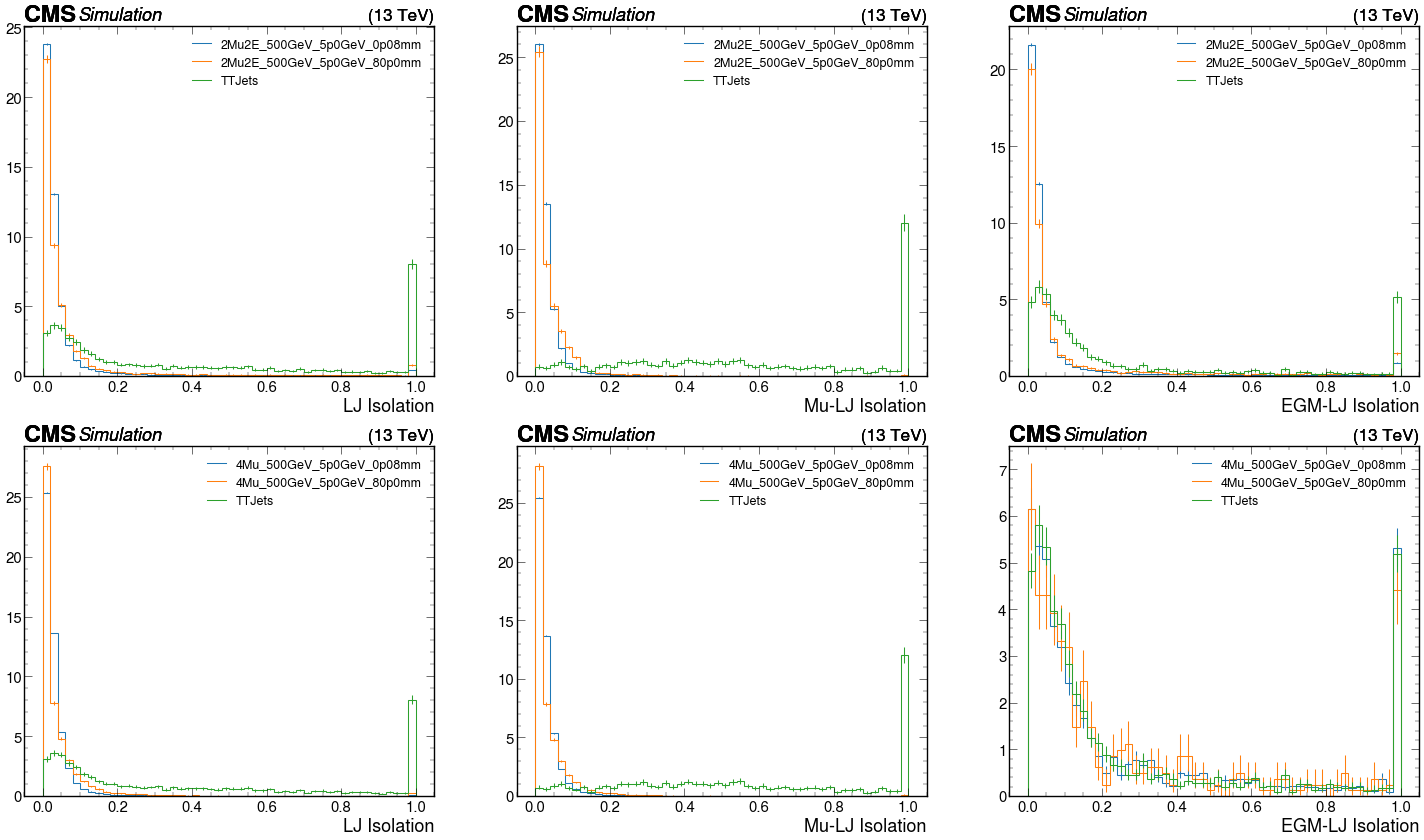

In [17]:
plt.subplots(2,3,figsize=(36,20))

plt.subplot(2,3,1)
for sample in samples_2mu2e:
    utilities.plot(out[sample]["hists"]["lj_isolation"][channels[0], :], density=True)
plt.legend(samples_2mu2e, loc=1, prop={'size': 18})

plt.subplot(2,3,2)
for sample in samples_2mu2e:
    utilities.plot(out[sample]["hists"]["mu_lj_isolation"][channels[0], :], density=True)
plt.legend(samples_2mu2e, loc=1, prop={'size': 18})

plt.subplot(2,3,3)
for sample in samples_2mu2e:
    utilities.plot(out[sample]["hists"]["egm_lj_isolation"][channels[0], :], density=True)
plt.legend(samples_2mu2e, loc=1, prop={'size': 18})

plt.subplot(2,3,4)
for sample in samples_4mu:
    utilities.plot(out[sample]["hists"]["lj_isolation"][channels[0], :], density=True)
plt.legend(samples_4mu, loc=1, prop={'size': 18})

plt.subplot(2,3,5)
for sample in samples_4mu:
    utilities.plot(out[sample]["hists"]["mu_lj_isolation"][channels[0], :], density=True)
plt.legend(samples_4mu, loc=1, prop={'size': 18})

plt.subplot(2,3,6)
for sample in samples_4mu:
    utilities.plot(out[sample]["hists"]["egm_lj_isolation"][channels[0], :], density=True)
plt.legend(samples_4mu, loc=1, prop={'size': 18})

#### Mu-LJ isolation looks promising!

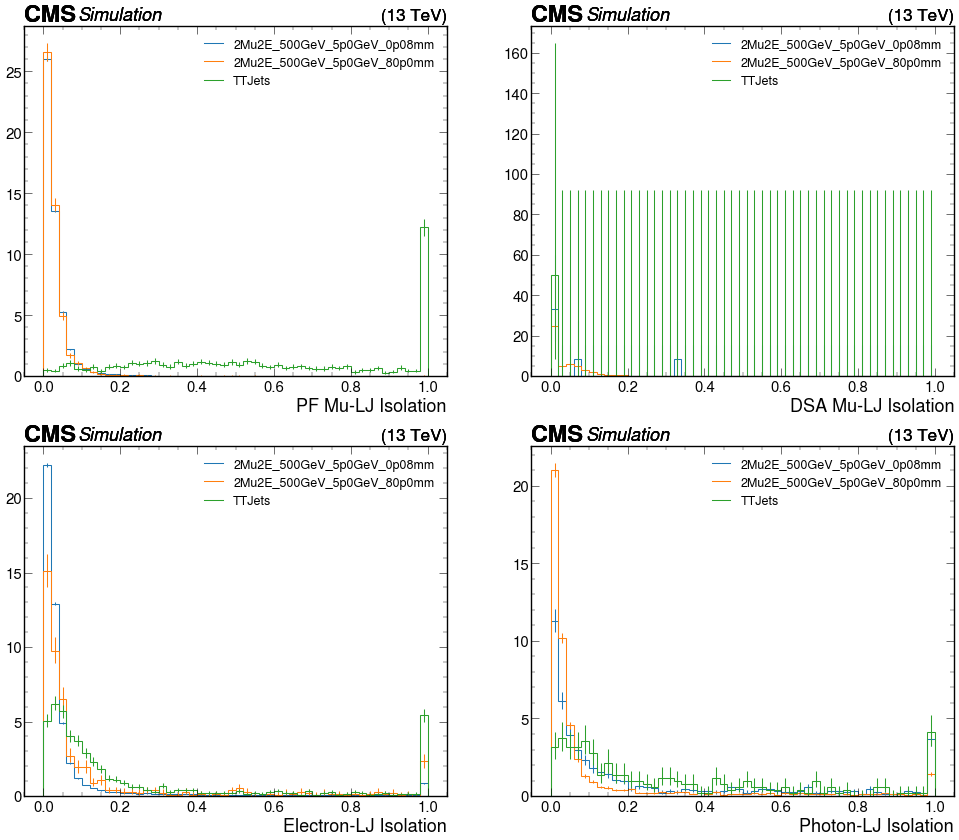

In [18]:
plt.subplots(2,2,figsize=(24,20))

plt.subplot(2,2,1)
for sample in samples_2mu2e:
    utilities.plot(out[sample]["hists"]["pfmu_lj_isolation"][channels[0], :], density=True)
plt.legend(samples_2mu2e, loc=1, prop={'size': 18})

plt.subplot(2,2,2)
for sample in samples_2mu2e:
    utilities.plot(out[sample]["hists"]["dsamu_lj_isolation"][channels[0], :], density=True)
plt.legend(samples_2mu2e, loc=1, prop={'size': 18})

plt.subplot(2,2,3)
for sample in samples_2mu2e:
    utilities.plot(out[sample]["hists"]["electron_lj_isolation"][channels[0], :], density=True)
plt.legend(samples_2mu2e, loc=1, prop={'size': 18})

plt.subplot(2,2,4)
for sample in samples_2mu2e:
    utilities.plot(out[sample]["hists"]["photon_lj_isolation"][channels[0], :], density=True)
plt.legend(samples_2mu2e, loc=1, prop={'size': 18})

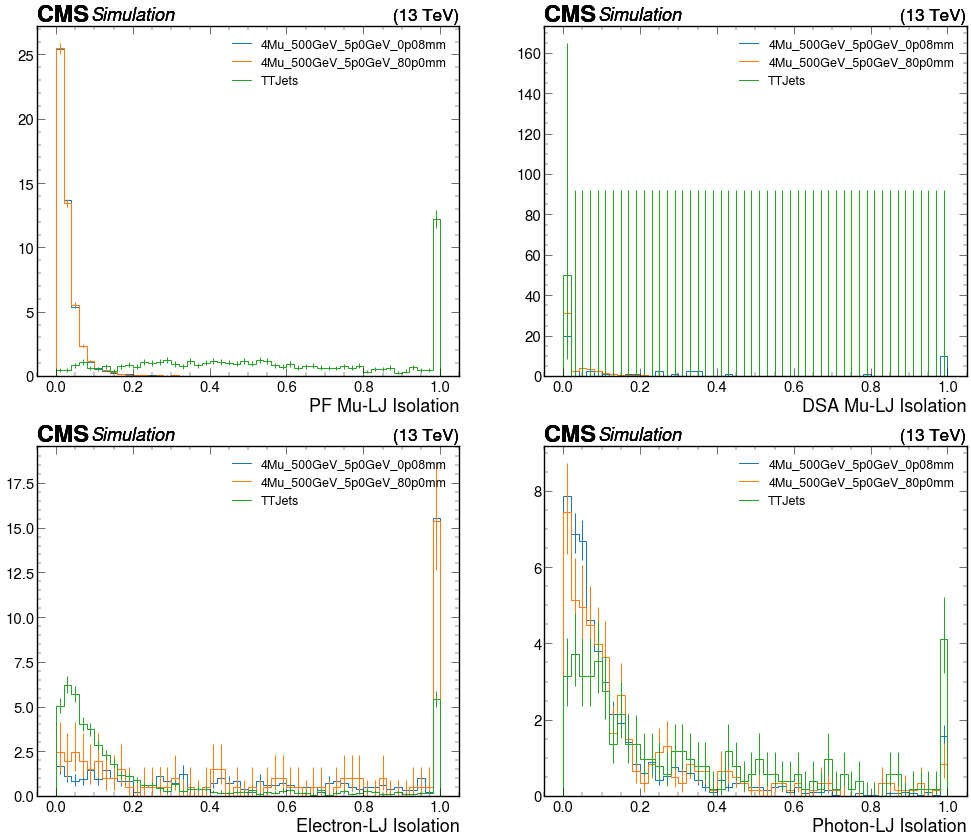

In [19]:
plt.subplots(2,2,figsize=(24,20))

plt.subplot(2,2,1)
for sample in samples_4mu:
    utilities.plot(out[sample]["hists"]["pfmu_lj_isolation"][channels[0], :], density=True)
plt.legend(samples_4mu, loc=1, prop={'size': 18})

plt.subplot(2,2,2)
for sample in samples_4mu:
    utilities.plot(out[sample]["hists"]["dsamu_lj_isolation"][channels[0], :], density=True)
plt.legend(samples_4mu, loc=1, prop={'size': 18})

plt.subplot(2,2,3)
for sample in samples_4mu:
    utilities.plot(out[sample]["hists"]["electron_lj_isolation"][channels[0], :], density=True)
plt.legend(samples_4mu, loc=1, prop={'size': 18})

plt.subplot(2,2,4)
for sample in samples_4mu:
    utilities.plot(out[sample]["hists"]["photon_lj_isolation"][channels[0], :], density=True)
plt.legend(samples_4mu, loc=1, prop={'size': 18})

#### PF Mu-LJ isolation show promising results that effectively separate signal and background.
#### We'll gonna select this value as ABCD value candidate.
#### One oddity is that I see short decay length samples in DSA that I didn't see previous plots.

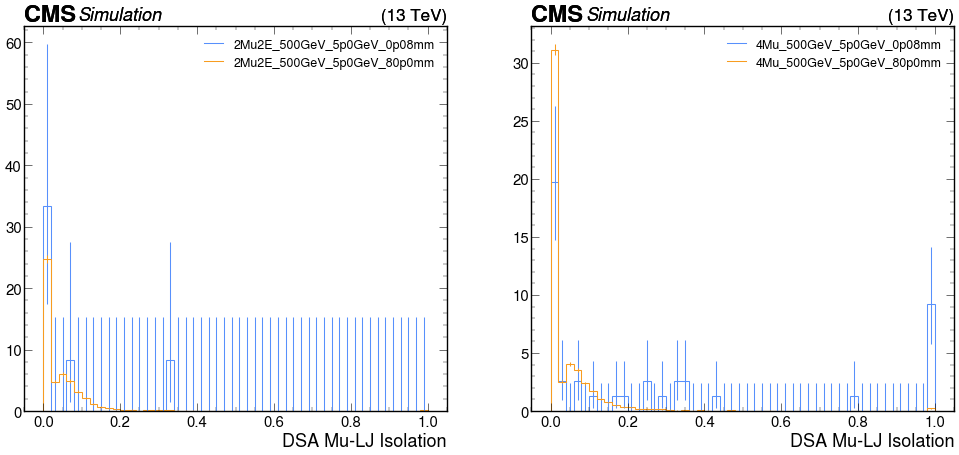

In [8]:
samples_2mu2e = [
    "2Mu2E_500GeV_5p0GeV_0p08mm",
    "2Mu2E_500GeV_5p0GeV_80p0mm",
]

samples_4mu = [    
    "4Mu_500GeV_5p0GeV_0p08mm",
    "4Mu_500GeV_5p0GeV_80p0mm",
]
plt.subplots(1,2,figsize=(24,10))

plt.subplot(1,2,1)
for sample in samples_2mu2e:
    utilities.plot(out[sample]["hists"]["dsamu_lj_isolation"][channels[0], :], density=True)
plt.legend(samples_2mu2e, loc=1, prop={'size': 18})

plt.subplot(1,2,2)
for sample in samples_4mu:
    utilities.plot(out[sample]["hists"]["dsamu_lj_isolation"][channels[0], :], density=True)
plt.legend(samples_4mu, loc=1, prop={'size': 18})

In [20]:
samples_2mu2e = [
    "2Mu2E_100GeV_5p0GeV_0p4mm",
    "2Mu2E_150GeV_5p0GeV_0p27mm",
    "2Mu2E_200GeV_5p0GeV_0p2mm",
    "2Mu2E_500GeV_5p0GeV_0p08mm",
    "2Mu2E_800GeV_5p0GeV_0p05mm",
    "2Mu2E_1000GeV_5p0GeV_0p04mm",    
]

samples_4mu = [    
    "4Mu_100GeV_5p0GeV_0p4mm",
    "4Mu_150GeV_5p0GeV_0p27mm",
    "4Mu_200GeV_5p0GeV_0p2mm",
    "4Mu_500GeV_5p0GeV_0p08mm",
    "4Mu_800GeV_5p0GeV_0p05mm",
    "4Mu_1000GeV_5p0GeV_0p04mm",
]

#### Now, let's move on to dependency on bound state mass.
#### In order to get more clear vision of signals, I skipped the background sample here.

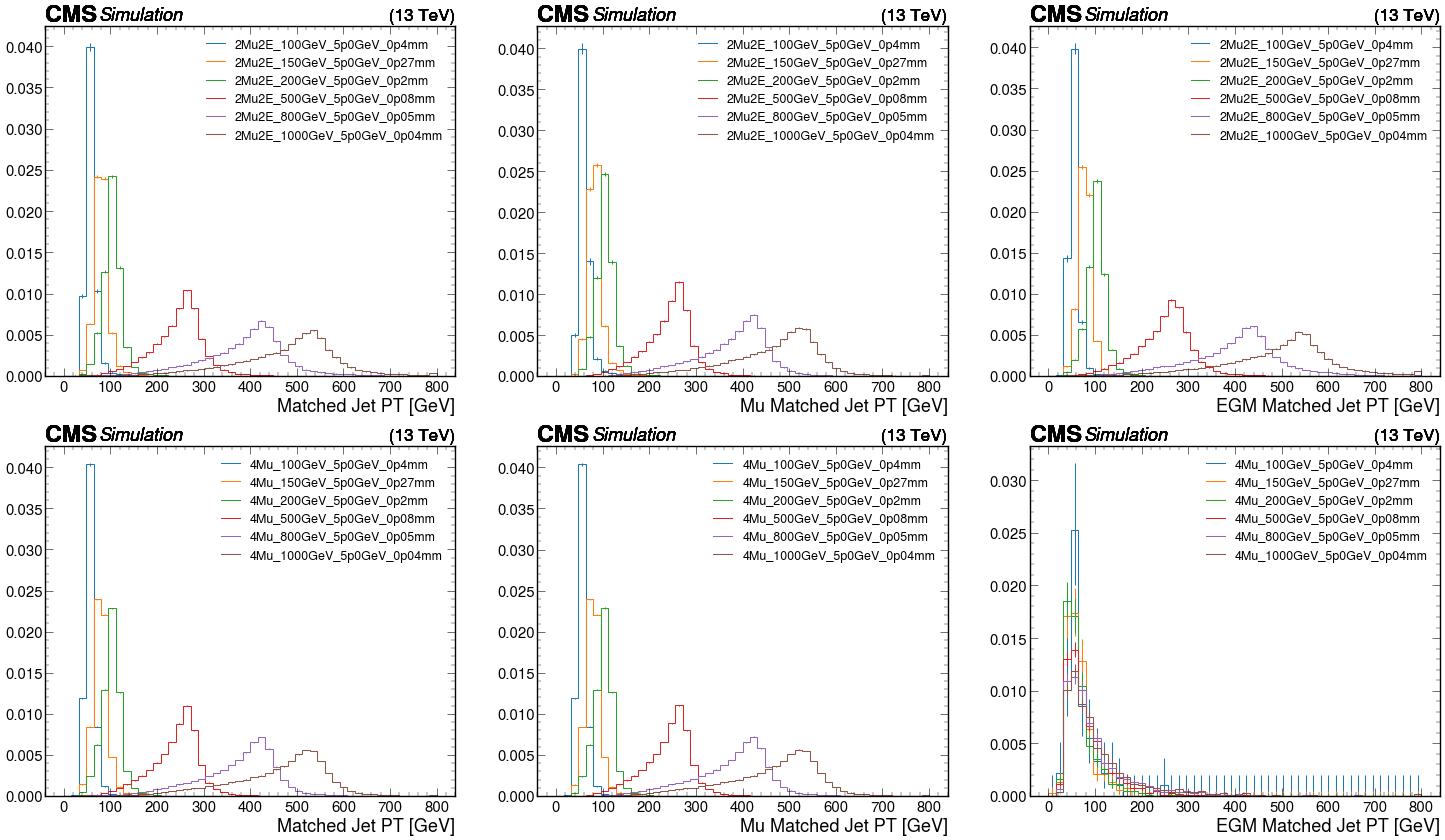

In [21]:
plt.subplots(2,3,figsize=(36,20))

plt.subplot(2,3,1)
for sample in samples_2mu2e:
    utilities.plot(out[sample]["hists"]["matched_jet_pt"][channels[0], :], density=True)
plt.legend(samples_2mu2e, loc=1, prop={'size': 18})

plt.subplot(2,3,2)
for sample in samples_2mu2e:
    utilities.plot(out[sample]["hists"]["mu_matched_jet_pt"][channels[0], :], density=True)
plt.legend(samples_2mu2e, loc=1, prop={'size': 18})

plt.subplot(2,3,3)
for sample in samples_2mu2e:
    utilities.plot(out[sample]["hists"]["egm_matched_jet_pt"][channels[0], :], density=True)
plt.legend(samples_2mu2e, loc=1, prop={'size': 18})

plt.subplot(2,3,4)
for sample in samples_4mu:
    utilities.plot(out[sample]["hists"]["matched_jet_pt"][channels[0], :], density=True)
plt.legend(samples_4mu, loc=1, prop={'size': 18})

plt.subplot(2,3,5)
for sample in samples_4mu:
    utilities.plot(out[sample]["hists"]["mu_matched_jet_pt"][channels[0], :], density=True)
plt.legend(samples_4mu, loc=1, prop={'size': 18})

plt.subplot(2,3,6)
for sample in samples_4mu:
    utilities.plot(out[sample]["hists"]["egm_matched_jet_pt"][channels[0], :], density=True)
plt.legend(samples_4mu, loc=1, prop={'size': 18})

#### For all signal samples, the $p_{T}$ of the matched jet has a peak at half the bound state mass.
#### Note that 4Mu channel doesn't have EGM type, so EGM matched-jet show typical PF jet behavior.
#### Let's move on to categorized matched-jet

/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:262: RuntimeWarning: divide by zero encountered in double_scalars
  self.flat_scale(1 / np.sum(np.diff(self.edges) * self.values))
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:197: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  return np.abs(method_fcn(self.values, variances) - self.values)
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:242: RuntimeWarning: invalid value encountered in multiply
  self.values *= scale
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:243: RuntimeWarning: invalid value encountered in multiply
  self.yerr_lo *= scale
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:244: RuntimeWarning: invalid value encountered in multiply
  self.yerr_hi *= scale
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:262: RuntimeWarning: divide by zero encountered in double_scalars
  self.flat_scale(1 / np.sum(np.diff(self.edges) * self.values))
/opt/conda/lib/p

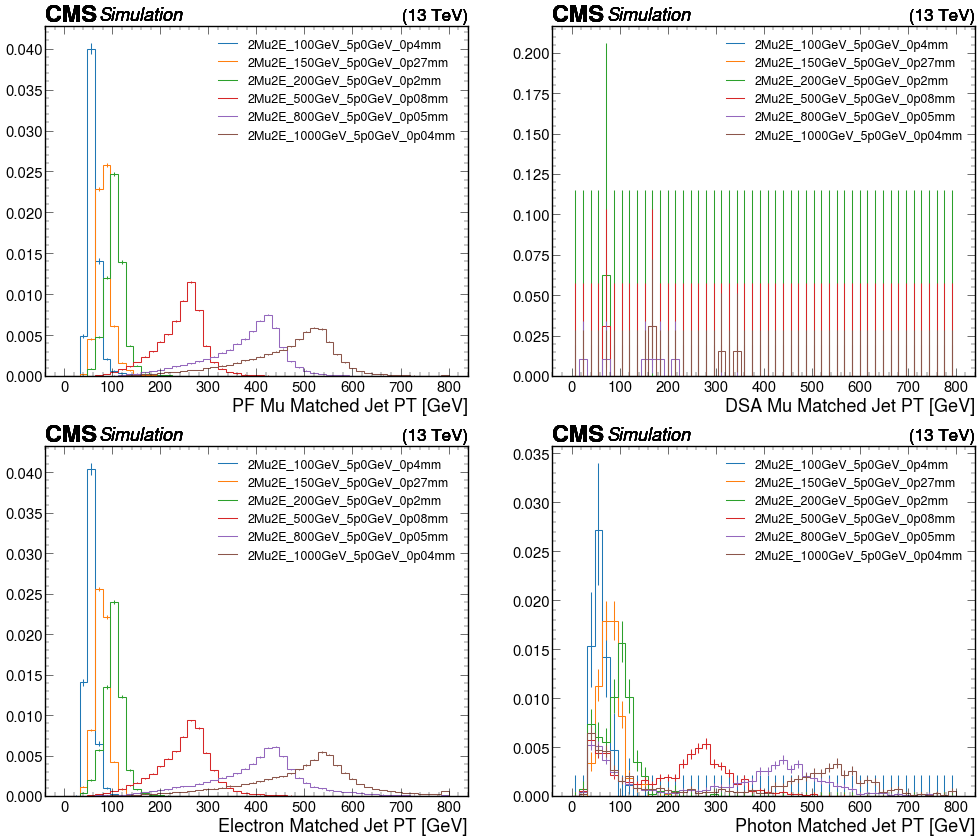

In [22]:
plt.subplots(2,2,figsize=(24,20))

plt.subplot(2,2,1)
for sample in samples_2mu2e:
    utilities.plot(out[sample]["hists"]["pfmu_matched_jet_pt"][channels[0], :], density=True)
plt.legend(samples_2mu2e, loc=1, prop={'size': 18})

plt.subplot(2,2,2)
for sample in samples_2mu2e:
    utilities.plot(out[sample]["hists"]["dsamu_matched_jet_pt"][channels[0], :], density=True)
plt.legend(samples_2mu2e, loc=1, prop={'size': 18})

plt.subplot(2,2,3)
for sample in samples_2mu2e:
    utilities.plot(out[sample]["hists"]["electron_matched_jet_pt"][channels[0], :], density=True)
plt.legend(samples_2mu2e, loc=1, prop={'size': 18})

plt.subplot(2,2,4)
for sample in samples_2mu2e:
    utilities.plot(out[sample]["hists"]["photon_matched_jet_pt"][channels[0], :], density=True)
plt.legend(samples_2mu2e, loc=1, prop={'size': 18})

#### PF Muon and Electron looks clear.
#### Since I only use shortest decay length samples for all bound state, photon type have low statistics.

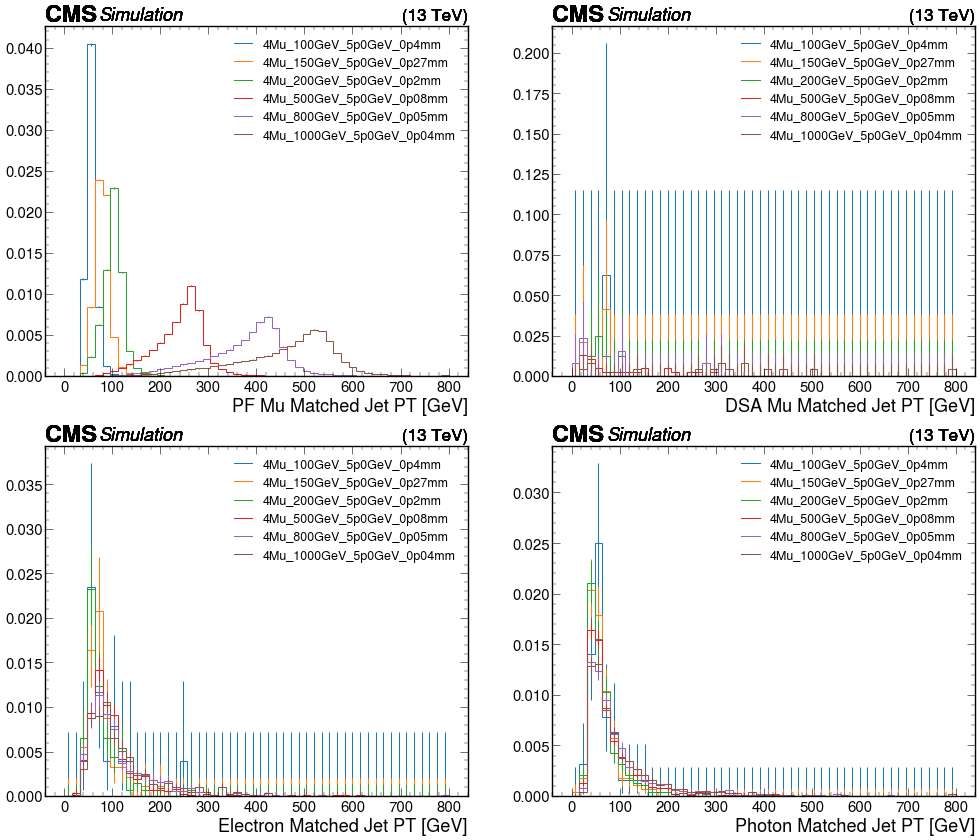

In [23]:
plt.subplots(2,2,figsize=(24,20))

plt.subplot(2,2,1)
for sample in samples_4mu:
    utilities.plot(out[sample]["hists"]["pfmu_matched_jet_pt"][channels[0], :], density=True)
plt.legend(samples_4mu, loc=1, prop={'size': 18})

plt.subplot(2,2,2)
for sample in samples_4mu:
    utilities.plot(out[sample]["hists"]["dsamu_matched_jet_pt"][channels[0], :], density=True)
plt.legend(samples_4mu, loc=1, prop={'size': 18})

plt.subplot(2,2,3)
for sample in samples_4mu:
    utilities.plot(out[sample]["hists"]["electron_matched_jet_pt"][channels[0], :], density=True)
plt.legend(samples_4mu, loc=1, prop={'size': 18})

plt.subplot(2,2,4)
for sample in samples_4mu:
    utilities.plot(out[sample]["hists"]["photon_matched_jet_pt"][channels[0], :], density=True)
plt.legend(samples_4mu, loc=1, prop={'size': 18})

#### Okay, let's ignore the electron and photon type because it's 4Mu samples.
#### And PF Mu distribution looks perfect.

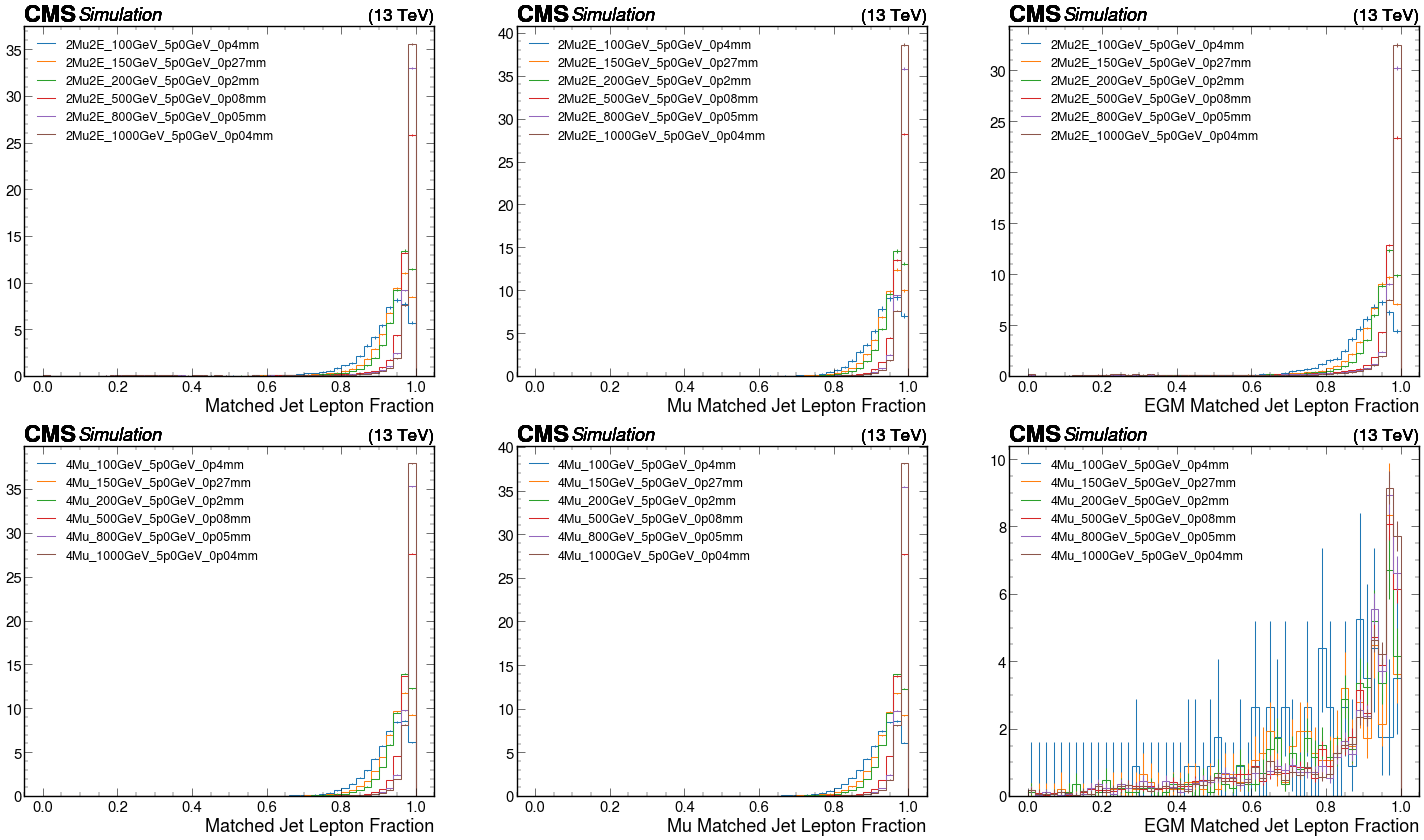

In [24]:
plt.subplots(2,3,figsize=(36,20))

plt.subplot(2,3,1)
for sample in samples_2mu2e:
    utilities.plot(out[sample]["hists"]["matched_jet_lepfraction"][channels[0], :], density=True)
plt.legend(samples_2mu2e, loc=2, prop={'size': 18})

plt.subplot(2,3,2)
for sample in samples_2mu2e:
    utilities.plot(out[sample]["hists"]["mu_matched_jet_lepfraction"][channels[0], :], density=True)
plt.legend(samples_2mu2e, loc=2, prop={'size': 18})

plt.subplot(2,3,3)
for sample in samples_2mu2e:
    utilities.plot(out[sample]["hists"]["egm_matched_jet_lepfraction"][channels[0], :], density=True)
plt.legend(samples_2mu2e, loc=2, prop={'size': 18})

plt.subplot(2,3,4)
for sample in samples_4mu:
    utilities.plot(out[sample]["hists"]["matched_jet_lepfraction"][channels[0], :], density=True)
plt.legend(samples_4mu, loc=2, prop={'size': 18})

plt.subplot(2,3,5)
for sample in samples_4mu:
    utilities.plot(out[sample]["hists"]["mu_matched_jet_lepfraction"][channels[0], :], density=True)
plt.legend(samples_4mu, loc=2, prop={'size': 18})

plt.subplot(2,3,6)
for sample in samples_4mu:
    utilities.plot(out[sample]["hists"]["egm_matched_jet_lepfraction"][channels[0], :], density=True)
plt.legend(samples_4mu, loc=2, prop={'size': 18})

#### All the signal show clean peak at 1 on lepton fraction.
#### One thing I notice that the lower the bound state mass, the flatter it tends to be.

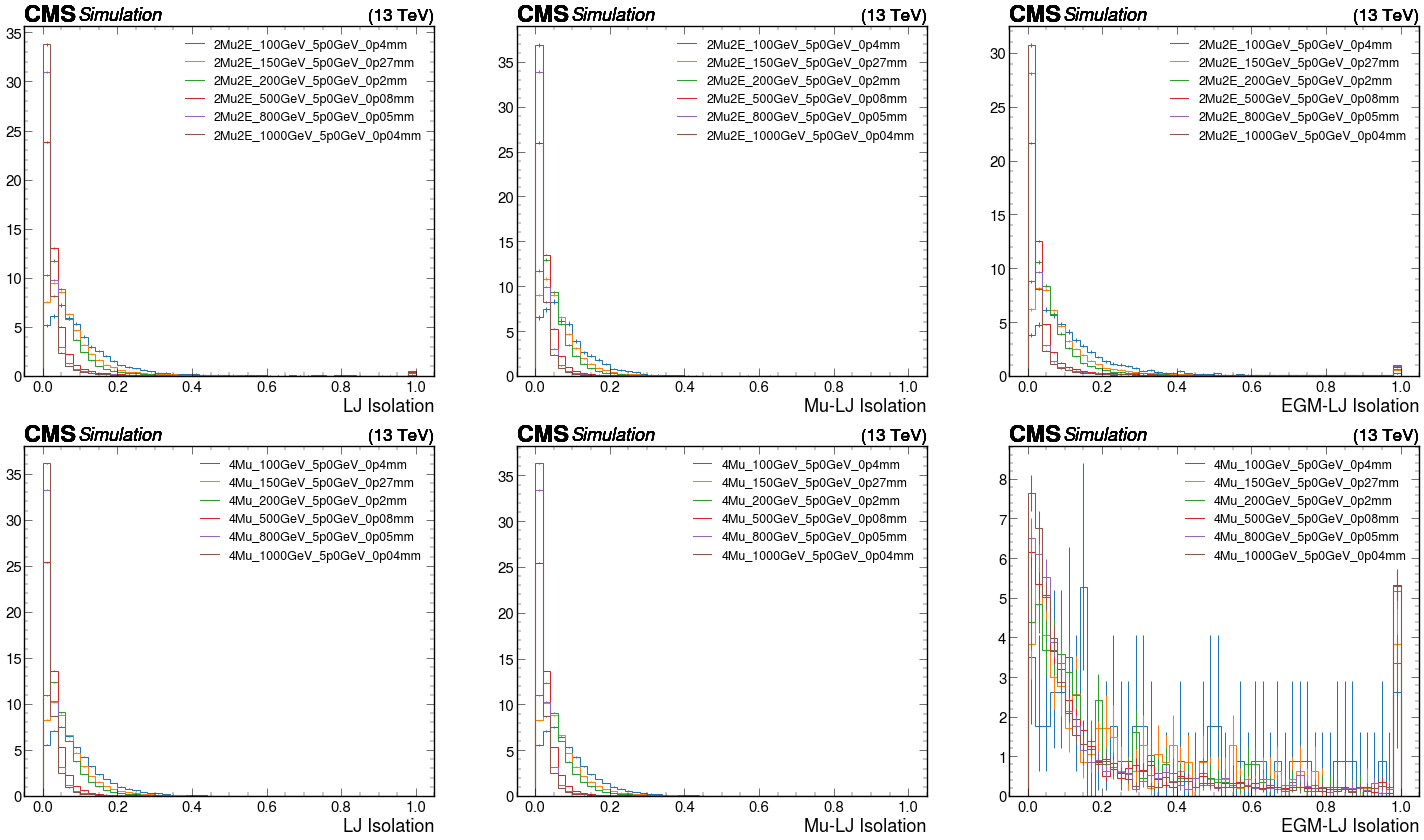

In [25]:
plt.subplots(2,3,figsize=(36,20))

plt.subplot(2,3,1)
for sample in samples_2mu2e:
    utilities.plot(out[sample]["hists"]["lj_isolation"][channels[0], :], density=True)
plt.legend(samples_2mu2e, loc=1, prop={'size': 18})

plt.subplot(2,3,2)
for sample in samples_2mu2e:
    utilities.plot(out[sample]["hists"]["mu_lj_isolation"][channels[0], :], density=True)
plt.legend(samples_2mu2e, loc=1, prop={'size': 18})

plt.subplot(2,3,3)
for sample in samples_2mu2e:
    utilities.plot(out[sample]["hists"]["egm_lj_isolation"][channels[0], :], density=True)
plt.legend(samples_2mu2e, loc=1, prop={'size': 18})

plt.subplot(2,3,4)
for sample in samples_4mu:
    utilities.plot(out[sample]["hists"]["lj_isolation"][channels[0], :], density=True)
plt.legend(samples_4mu, loc=1, prop={'size': 18})

plt.subplot(2,3,5)
for sample in samples_4mu:
    utilities.plot(out[sample]["hists"]["mu_lj_isolation"][channels[0], :], density=True)
plt.legend(samples_4mu, loc=1, prop={'size': 18})

plt.subplot(2,3,6)
for sample in samples_4mu:
    utilities.plot(out[sample]["hists"]["egm_lj_isolation"][channels[0], :], density=True)
plt.legend(samples_4mu, loc=1, prop={'size': 18})

#### Same here. If the bound state mass is high, it will peak cleanly at zero.
#### For the lowest bound state, you can see that the position of the peak is different.
#### What makes this difference? Need to discuss